# Two Neuron Day 7 (05/01/2026)
***Adding an Inhibitory Connection***

## Concept
- Excitatory synapse -> increases postsynaptic activity
- Inhibitory synapse -> decreases postsynaptic activity

**Neuron A**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#Time parameters
dt=0.1
T=100
time=np.arange(0,T,dt)

# Neuron A parameters
V_rest_A=-65
V_A=np.zeros(len(time))
V_A[0]=V_rest_A

#Input Current (constant)
I_A = 6
tau_A=10

# Spikes A
V_th_A = -63
V_reset_A = -65
spikes_A= np.zeros(len(time))

#Refractory period 
refractory_period_A = 2
refractory_steps_A = int(refractory_period_A / dt)
refractory_timer_A= 0

#Voltage update loop
for t in range(1,len(time)):
    if refractory_timer_A >0:
        V_A[t] = V_reset_A
        refractory_timer_A -= 1

    else:
        dV_A= (-(V_A[t-1] - V_rest_A ) + I_A) * (dt/tau_A)
        V_A[t] = V_A[t-1] + dV_A

        if V_A[t] >= V_th_A :
            spikes_A[t] = 1
            V_A[t] = V_reset_A
            refractory_timer_A = refractory_steps_A

#Firing rate calculation
total_spikes_A = np.sum(spikes_A)
total_time_sec_A= T/1000

firing_rate_A = total_spikes_A / total_time_sec_A
firing_rate_A

np.float64(160.0)

**Neuron A Graph**

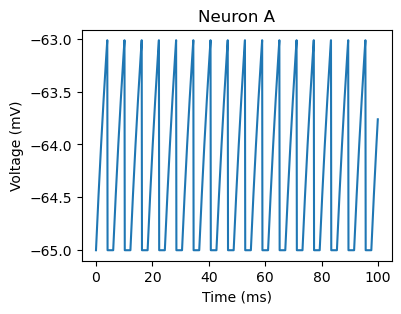

In [14]:
plt.figure(figsize=(4,3))
plt.plot(time,V_A)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.title("Neuron A")
plt.show()

**Spike Train Neuron A**

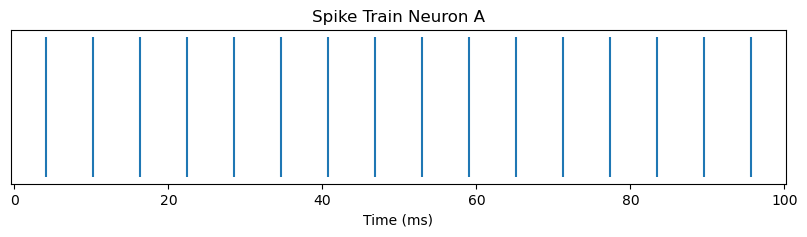

In [18]:
spike_times_A = time[spikes_A == 1]

plt.figure(figsize=(10,2))
plt.vlines(spike_times_A,ymin=0,ymax=1)
plt.xlabel("Time (ms)")
plt.yticks([])
plt.title("Spike Train Neuron A")
plt.show()

**Neuron B**

In [13]:
#Neuron A parameters 
V_rest_B = -65
V_B = np.zeros(len(time))
V_B[0] = V_rest_B

#Input Current (comes from Neuron A) 
# Synapthic connection from A-> B
w_AB = 15
I_B= np.zeros(len(time))
syn_current_B = np.zeros(len(time))

#Inhibitory synapse from A-> B
w_AiB = 2.5
syn_current_inh_B = np.zeros(len(time))

#Spikes
V_th_B = -63
V_reset_B = -65
spikes_B = np.zeros(len(time))

#Refractory period
refractory_period_B = 2
refractory_steps_B = int(refractory_period_B / dt)
refractory_timer_B =0

# Voltage update loop for Neuron B
for t in range(1,len(time)):
    #Synapthic input from Neuron A
    syn_current_B[t] = syn_current_B[t-1] * 0.9 + w_AB * spikes_A[t-1]
    syn_current_inh_B[t] = syn_current_inh_B[t-1]*0.9 + w_AiB * spikes_A[t-1]
    I_B[t] = syn_current_B[t] - syn_current_inh_B[t]


    if refractory_timer_B>0:
        V_B[t] = V_reset_B
        refractory_timer_B-=1

    else:
        dV_B = (-(V_B[t-1] - V_rest_B) + I_B[t]) * (dt / tau_A)
        V_B[t] = V_B[t-1] + dV_B

        if V_B[t] >= V_th_B:
            spikes_B[t]=1
            V_B[t] = V_reset_B
            refractory_timer_B = refractory_steps_B

#Firing rate calculation
total_spikes_B = np.sum(spikes_B)
total_time_sec_B= T/1000

firing_rate_B = total_spikes_B / total_time_sec_B
firing_rate_B

np.float64(40.0)

**Neuron B Graph**

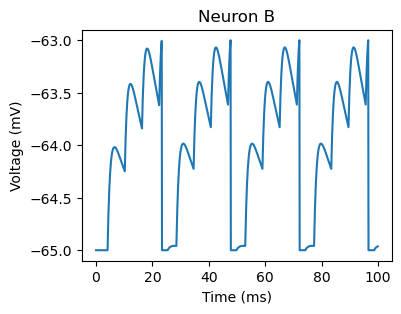

In [21]:
plt.figure(figsize=(4,3))
plt.plot(time,V_B)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.title("Neuron B")
plt.show()

**Spike Train Neuron B**

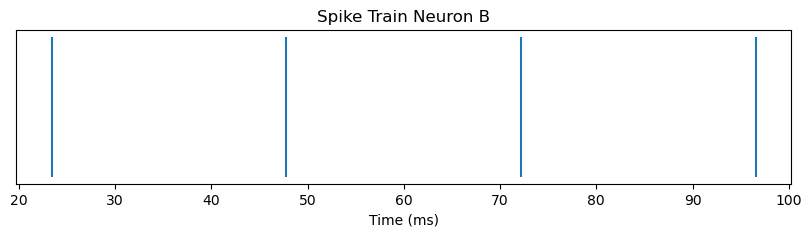

In [20]:
spike_times_B = time[spikes_B == 1]

plt.figure(figsize = (10,2))
plt.vlines(spike_times_B,ymin=0,ymax=1)
plt.xlabel("Time (ms)")
plt.yticks([])
plt.title("Spike Train Neuron B")
plt.show()

## Observation: Two-Neuron Circuit with Excitation and Inhibition

The two-neuron circuit demonstrates how neural activity propagates through synaptic interactions.
Excitatory synaptic input from Neuron A promotes firing in Neuron B through temporal summation.
Introducing inhibitory input suppresses this activity and can prevent Neuron B from firing entirely.
The resulting behavior depends on the balance between excitatory and inhibitory synaptic strengths.
This illustrates how inhibition regulates signal flow and stabilizes neural circuits.

Neuron A fires regularly due to constant external input.
Neuron B’s membrane potential and spike timing depend on synaptic input from Neuron A.
Excitatory input leads to delayed spiking in Neuron B, while inhibitory input suppresses this activity.
The voltage and spike train plots clearly illustrate causal signal propagation and excitation–inhibition balance.
